# Linear Regression

*by Eric Bridgeford*

## Goal

The goal of linear regression is simple: for any real valued, multivariate input, provide the "most-likely" real valued output. Stated another way:

Given: $(X, Y) = \left\{(x_i, y_i)\right\}_{i=1}^N, x_i \in \mathbb{R}^d, y \in \mathbb{R}$
Can we find $\textrm{argmin}_w L(w | x, y)$, or the weights for our model that will minimize our loss for each training example?

### Model

Essentially, with the OLS solution, we assume that our data can be described by a multivariate equation, 
\begin{align*}
    Y_{N, 1} &= X_{N, d}W_{d, 1} + \epsilon_{N, 1} \\
    Y_{N, 1} &= \hat{Y}_{N, 1} + \epsilon_{N, 1}
\end{align*}

where $\hat{Y} = XW$. Let's look a little more closely at what this means for us:


\begin{align*}
    \begin{bmatrix} y_1\\
    \vdots \\
    y_N
    \end{bmatrix}
    &= 
    \begin{bmatrix}
        1 & x_1^{(1)} &\;...\; &x_1^{(d)} \\
        \vdots & \vdots & \;...\; &\vdots \\
        1 & x_N^{(1)} &\;...\; &x_N^{(d)}
    \end{bmatrix}
    \begin{bmatrix}
        w_0 \\
        \vdots \\
        w_d
    \end{bmatrix} +
    \begin{bmatrix}
    \epsilon_1 \\
    \vdots \\
    \epsilon_N
    \end{bmatrix}
\end{align*}


## Loss Functions

Previously, we mention this $\textrm{argmin}_w L(w | x, y)$ that we call a loss function. While here we only need one parameter, $w$, this can be generalized to virtually any learning algorithm. What this says is, given data $x$, and expected outputs $y$, how can we find the parameters $\theta = \left\{\theta_1, ...\theta_m\right\}$ to maximize the fit of our data?

### Ordinary Least Squares (OLS) Loss Function

By far, the most common solution to the loss-function question for linear regression is the least-squares function. You may have heard this referred to by a number of names: sum of squared errors, sum of squared residuals, OLS, etc; these names all point to the same function. 

We can see that just by moving some terms around from our model, we will see that $\epsilon = Y - \hat{Y}$, or that the error (aka, the residuals) is just the difference between our observations and the predictions (indicated by the $\hat{Y}$) that we can make given $W$. We can interpret this graphically (in a 2D example) as:

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Linear_least_squares_example2.svg">

Where we can see our predicted $\hat{Y}$ in blue, our goal $Y$ in red, and our residual/errors $\epsilon$ in green.

To "sum" the squared errors/residuals, we simply consider:

\begin{align*}
    SSR = \frac{1}{2}\sum_{i=1}^N (\epsilon_i)^2 &= \frac{1}{2}\sum_{i=1}^N (y_i - x_i w)^2 \\
    \frac{1}{2}\sum_{i=1}^N(y_i - \hat{y}_i)^2&= \frac{1}{2}\left(\sum_{i=1}^N\left(y_i - \sum_{j=1}^{d+1}x_i^{(j)}w_j\right)\right)^2 \\
    &= ||y - \hat{y}||_2^2
\end{align*}

We will ignore the $\frac{1}{2}$ for now since it is just a constant, and therefore will not impact any calculus we do. The notation $||\cdot||_2^2$ is just the traditional squared $L-2$ norm you are all used to given input $\cdot$; the Euclidian length of a vector in euclidian space is an example of a $L-2$ norm.

Where $x_i  = \begin{bmatrix} 1,& x_i^{(1)},& \;...\;&x_i^{(d)}\end{bmatrix} \in \mathbb{R}^{1, d+1}$ is just the rows from our matrix $X$ above, and $w = \begin{bmatrix} w_0, & w_1, &\;...\;w_d \end{bmatrix}^T \in \mathbb{R}^{d+1, 1}$ is just our column vector of weights. Using matrices, we can very easily rewrite this as the quadratic:

\begin{align*}
    \epsilon^T\epsilon &= (Y - \hat{Y})^T(Y - \hat{Y}) \\
    2SSR &= (Y - XW)^T(Y - XW) \\
    &= (Y^T - W^TX^T)(Y - XW) \\
    &= Y^TY - Y^TXW - W^TX^TY + W^TX^TXW
\end{align*}

We know that the value we are looking for is going to be a scalar (as we are considering $SSR \in \mathbb{R}^1$). Then, it is easy to see that since the transpose of any scalar is also a scalar, that we can simply let $-2Y^TX = (-2Y^TX)^T = -2X^TY$.

\begin{align*}
    SSR &=  Y^TY- 2Y^TXW + X^TW^TXW 
\end{align*}

Finally, we can restate our optimization problem:

\begin{align*}
    \hat{W} = \textrm{argmin}_W SSE(W | X, Y)
\end{align*}

or, given our training examples $X$ and our expected predictions $Y$, can we find weights $W$ that minimize our squared-error loss? We differentiate with respect to $W$:

\begin{align*}
    \frac{\delta SSR}{\delta W} &= \frac{\delta (Y^TY - 2Y^TXW + X^TW^TXW)}{\delta W}
\end{align*}

As far as taking matrix derivatives goes. Linear derivatives are exactly like univariate calculus. We notice that $-2Y^TXW$ is linear in $W$, so the derivative with respect to $W$ is simply $-2Y^TX$. The quadratic form $X^TW^TXW$ is a little different, but still pretty simple. Just drop the $W^T$ term, and multiply by $2$ like you are used to in univariate calculus.

\begin{align*}
    0 &= -2Y^TX + 2X^TXW \\
    -2X^TXW &= -2X^TY \\
    (X^TX)^{-1}X^TXW &= (X^TX)^{-1}X^TY \\
    \hat{W} &= (X^TX)^{-1}X^TY
\end{align*}

where our $W$ is just our "best fit" $\hat{W}$ based on the loss function we described.

## Training

To "train" the a linear regression classifier with the least-squares loss function, just use the closed-form solution above to compute the best weights $\hat{W}$ that minimize the squared error given your inputs $X$ and outputs $Y$.

## Prediction

To make a prediction, once we have our $\hat{W}$, we can simply dot our new input $X_{new}$ with our weight vector $\hat{W}$ that just have just trained:

\begin{align*}
    y_{prediction} = x_{new}W
\end{align*}

Where our prediction $y_{prediction} \in \mathbb{R}^1$, $x_{new} \in \mathbb{R}^{1, d}$.

## Regularization

To regularize our model, we will look at the simple ridge regression model (see tutorial [regularization](./regularization.ipynb)).It is easy to derive a new solution using the same derivation from above:

\begin{align*}
    \hat{W} &= \textrm{argmin}_W \left[SSR(W | X, Y) + \frac{\lambda}{2}||W||_2^2\right] \\
    &\rightarrow \frac{1}{2}(Y - XW)^T(Y - XW)^T + \frac{\lambda}{2}W^TW \\
    RSSR(W | X, Y, \lambda) &= Y^TY - 2Y^TXW + X^TW^TXW + \lambda W^TW
\end{align*}

Where again we ignore the $\frac{1}{2}$ since it is only there in the first place for notational convenience when taking the derivatives. Do not get confused by SSR (Sum of Squared Residuals, or the loss function for the Ordinary Least Squares solution) and RSSR (regularized sum of squared residuals, or the regularized version of the OLS solution). Our solution becomes:

\begin{align*}
    \frac{\delta RSSR}{\delta W} &= \frac{Y^TY - 2Y^TXW + X^TW^TXW + \lambda W^TW}{\delta W} \\
    0 &= -2X^TY + 2X^TYW + 2\lambda I W \\
    \hat{W} &= (X^TX + \lambda I)^{-1}X^TY
\end{align*}

Where $I$ is just the identity matrix.

## Writing an Algorithm

There is no standard procedure to writing an algorithm; literally anyone can do it, creating a problem: how can we trust that a given algorithm performs to our standards?

There is no easy solution to this question, however, an investigator I work with, Dr. Josh Vogelstein in the BME/AMS department, has taken a stab at it. Here is a link to [methods_paper](https://github.com/neurodata/checklists/blob/master/methods_paper.md) put together by Jovo, which essentially introduces the most basic framework for producing an algorithm and being able to demonstrate to others that it unambiguously achieves some goal that you set out for it. Essentially, this methods introduction provides all of the information an investigator might need to trust your algorithm. These aspects are: setting (what does your algorithm seek to satisfy?), pseudocode (what does the actual algorithm do?), synthetic tests (does your algorithm perform when you would expect it to?), and real data (how does it do on an actual dataset?). These aspects should, intuitively, be purely foundational for any code segment, but it is especially critical for a Machine Learning algorithm to satisfy these requirements, otherwise, your algorithm is worthless!

# Code Tutorial

Consider the following set up:

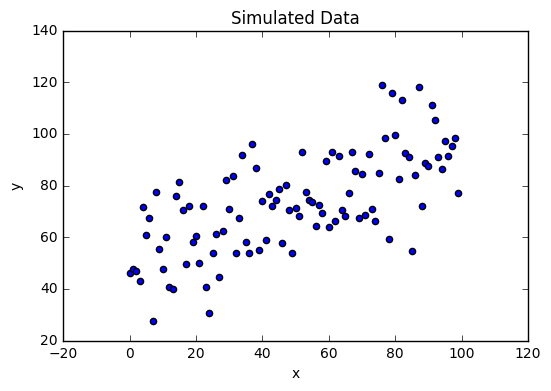

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = 100  # the number of samples we want
d=1  # number of dimensions
X = np.linspace(0, 99, n).reshape(n, d)  # pick points along a line and reshape so it is dimensions
covar = 200*np.identity(d)  # simulated 2d data with identity covariance
R = np.hstack(((np.ones((n,1)), X)))  # remember the vector of ones for the constsant term
W = np.array([50, .5]).reshape(d+1, 1)
Y = R.dot(W) + np.random.multivariate_normal(mean=np.zeros((d,)),
                                             cov=covar,
                                             size=n)  # generate data with mean given by equation 2 + 2x

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Simulated Data')

fig.show()

First, we inspect our data for any resounding features that may make algorithm choice more intuitive. The most obvious thing is, this data follows some sort of linear trend, so it may be a good candidate for our least-squares method we explored previously. Performing least squares regression is easy. Given our training dataset, we can simply use a direct application of what we previously learned:

In [49]:
What = np.linalg.inv(R.T.dot(R)).dot(R.T).dot(Y)

print("Actual Intercept: " + str(W[0]) + " Predicted Intercept: " + str(What[0]))
print("Actual Slope: " + str(W[1]) + " Predicted Slope: " + str(What[1]))

Actual Intercept: [ 50.] Predicted Intercept: [ 50.73793464]
Actual Slope: [ 0.5] Predicted Slope: [ 0.54223047]


Not too bad eh? Now, let's visualize our data with the predicted solution, and the "correct" solution:

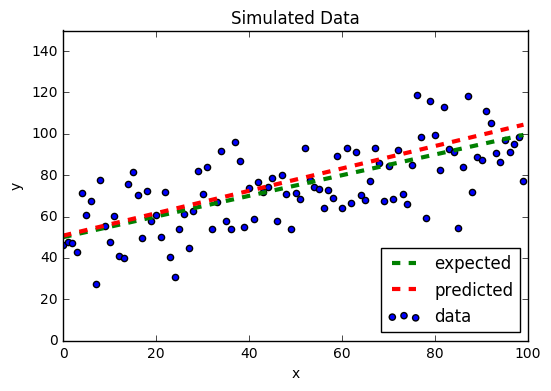

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Simulated Data')

ax.plot(X, R.dot(W), color='g', linewidth=3, linestyle='--')
ax.plot(X, R.dot(What), color='r', linewidth=3, linestyle='--')
ax.set_xlim([0, 100])
ax.set_ylim([0,150])
ax.legend(['expected', 'predicted', 'data'], loc='lower right')

fig.show()

Looking good! Another good thing to do during the algorithm development process is to think about when your algorithm might perform poorly. Let's consider another possible example dataset:

In [ ]:
Xnew = np.linspace(0, 99, n).reshape(n, d)

Ynew = 